In [1]:
# 로지스틱 모델 (붓꽃) 데이터 활용 
import numpy as np 
import matplotlib.pylab as plt 

# 데이터 로드 
from sklearn import datasets

# 로지스틱 회귀모델 훈련 
from sklearn.linear_model import LogisticRegression 



In [15]:
# !pip install scikit-learn

# iris 붓꽃 
iris = datasets.load_iris()
list_iris=[]

# dict_key 무엇인지 확인 
list_iris = iris.keys()

print(list_iris)
# dict_keys(['data', 'target', 'frame', 
#'target_names', 'DESCR', 'feature_names', 'filename'])

x = iris['data'][:,3:] # 꽃잎의 너비 변수만 사용 
y = (iris['target'] == 2).astype("int") # ris-Versinica 1 아니면 0 
print("iris 꽃잎의 너비 \n", x)
print(y)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris 꽃잎의 너비 
 [[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.

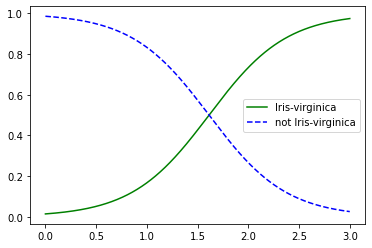

In [18]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x,y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                  intercept_scaling=1, l1_ratio=None, max_iter=100, 
                  random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                  warm_start=False)

# 이제 꽃잎이 너비가 0 ~ 3cm 인 꽃에 대해 모델의 추정확률 을 계산 
# -1 의미는 변경된 배열의 -1위치의 차원은 원래 배열의 길이와 남은 차원으로 부터 추정된다라는 뜻
x_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:,1], 'g-', label = "Iris-virginica") 
plt.plot(x_new, y_proba[:,0], 'b--', label = "not Iris-virginica")
plt.legend()
plt.show()

/Users/home/miniforge3/envs/pytorchAI/lib/python3.8/site-packages/matplotlib/patches.py:1387: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


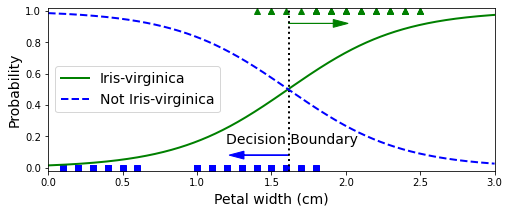

In [21]:
# 좀더 보기 좋게 변경 
x_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:,1]>= 0.5][0] # 0.5 인 이상인 경우 

plt.figure(figsize = (8,3)) # 그래프 사이즈 
plt.plot(x[y==0], y[y==0], 'bs')
plt.plot(x[y==1], y[y==1], 'g^')

# 결정경계 표시 
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth = 2)

# 추정확률 plotting 
plt.plot(x_new, y_proba[:,1], 'g-', linewidth = 2, label="Iris-virginica")
plt.plot(x_new, y_proba[:,0], 'b--', linewidth = 2, label="Not Iris-virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision Boundary", fontsize=14, color='k', 
         ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width = 0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width = 0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)" , fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc = "center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()


In [22]:
# 해석 그래프를 보면  Iris virginica 1.4 ~ 2.5 
# 일반적인 꽃잎 -> 1.8 보다 작게 분포 
# 중첩 구간이 존재합니다. 

# 결정경계가 어떤 값을 가지고 있는지 확인 
print("decision_boundary : " , decision_boundary)

decision_boundary :  [1.61561562]


In [25]:
# 양쪽의 확률이 50퍼센트 가 되는 1.6 근방에서 결정경계 가 만들어지고 분류기는 1.6 크면 Iris virgincia 분류 
# 작으면 일반 꽃 잎 
test_code = log_reg.predict([[1.23], [1.28]])
print(f"진짜 우리가 원하는 분류가 되는가 확인 test code , 분리기준 : {decision_boundary} 결과 {test_code}")

진짜 우리가 원하는 분류가 되는가 확인 test code , 분리기준 : [1.61561562] 결과 [0 0]


In [27]:
# 꽃잎 너비 와 꽃잎 길이 2개의 변수를 이용해서 훈련 실습 
x = iris['data'][:,(2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(x,y)


<ipython-input-27-84a6ab9fb144>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


LogisticRegression(C=10000000000, random_state=42)

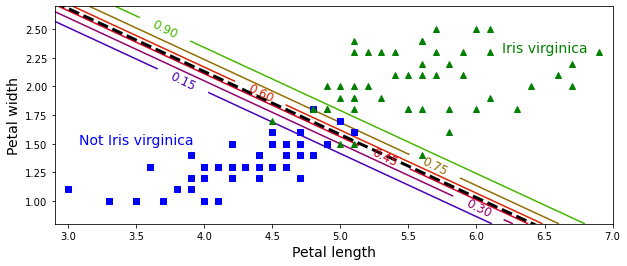

In [32]:
# 2차원 그리드 포인트 생성 
# 변수가 2개인 2차원 함수의 그래프를 그리거나 표로 작성하려면 2차원 영역에 대한 (x,y) 좌표값 쌍 즉 그리드 포인트를 생성하여 
# 각좌표에 대한 함수값을 계산한다.

# -> meshgird 명령어 : 그리드 포인트 
x1, x2 = np.meshgrid(
    np.linspace(2.9, 7 , 500).reshape(-1,1),
    np.linspace(0.8, 2.7, 200).reshape(-1,1),
)

x_new = np.c_[x1.ravel(), x2.ravel()]
y_proba = log_reg.predict_proba(x_new)

plt.figure(figsize=(10,4))
plt.plot(x[y==0,0], x[y==0,1], "bs")
plt.plot(x[y==1,0], x[y==1,1], "g^")

zz = y_proba[:,1].reshape(x1.shape)
contour = plt.contour(x1,x2,zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]


plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()